# Plotting for Final Project
## Example: Plotting Randomly Generated Stars in Aitoff projection
======================================

This is an example how to plot data using the astropy.coordinates package in
the Aitoff projection. Here a randomly generated data set will be used. The
final script can be found below.

First we need to import the required packages. We use matplotlib here for
plotting and numpy to get the value of pi.

In [180]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We now generate random data for visualisation. For RA this is done in the range
of 0 and 360 degrees (``ra_random``), for DEC between -90 and +90 degrees
(``dec_random``).

In [181]:
ra_random = np.random.rand(100)*360.0 #This command uses numpy to generate 100 random coordinates from 0 to 360 degrees
dec_random = np.random.rand(100)*180.0-90.0 #This command does the same from -90 to +90 degress

As next step, those coordinates are transformed into an astropy.coordinates
`~astropy.coordinates.SkyCoord` object.

In [182]:
c = SkyCoord(ra=ra_random*u.degree, dec=dec_random*u.degree, frame='icrs')
#ICRS stands for International Celestial Reference System: https://en.wikipedia.org/wiki/International_Celestial_Reference_System
#The command above is taking our randomly generated coordinates and defining them as RA and DEC in ICRS coordinates

Because matplotlib needs the coordinates in radians, we have to convert them from degrees into radians.

In [183]:
#ra_rad = c.ra.radian #this converts the coordinates from degrees to radians
#dec_rad = c.dec.radian

Furthermore matplotlib needs the RA coordinate (here, the x coordinate) in the range between -pi and pi, not 0 and 2pi. This means that all values that are larger than pi (180 degrees) are subtrated by 2pi to get the required range.

In [184]:
#ra_rad[ra_rad > np.pi] -= 2. * np.pi

As the last step we set up the plotting environment with matplotlib.

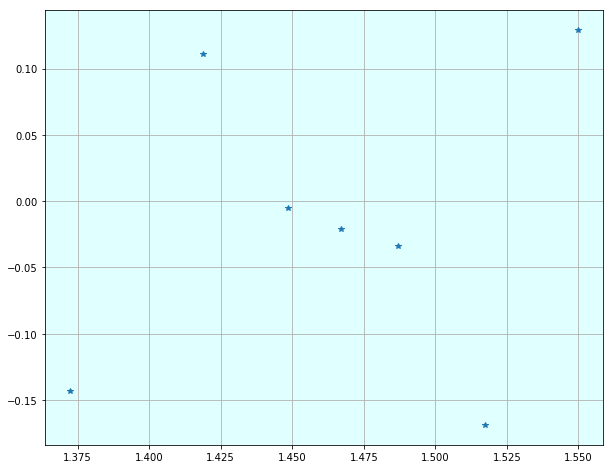

In [185]:
## PLOT CELL
fig = plt.figure(figsize=[10, 8]) #This controls the size of the figure
plt.subplot(111, axisbg='LightCyan') #111 makes the interval 1; 
plt.grid(True)  # shows lines with values
plt.plot(ra_rad, dec_rad, '*')   #plots points as * at a point (x,y)
plt.show()

Awesome! Now we have our sky plot, but is it the shape that we want it in? We have maps of the earth that usually look like this: <img src="https://i.stack.imgur.com/egiWd.png">

What's different about this map and our own? How do we get from our own rectangular map to the one above? We'll begin by looking at this link: https://en.wikipedia.org/wiki/Map_projection

After we've discussed different types of projections, we can see if python has a built in map projection. (I have a sneaky suspicion that it does!) See if you can find some options on google for projecting a spherical map. As a hint, you might want to start with the astropy library: http://www.astropy.org/astropy-tutorials/ Once you've found a projection method, test it out in the cell below using our data from the cell that begins with a comment saying ##PLOT CELL

aitoff


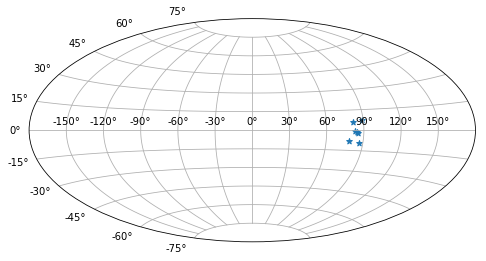

In [186]:
print 'aitoff'
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="aitoff")
plt.grid(True)
ax.scatter(ra_rad, dec_rad,marker = '*')
           

Let's divide our project up into steps. 
1. We would like to make a sky map, as seen from earth, of all five clusters used last week, as shown above the equatorial sky. The x-axis tick labels should reflect the hour that these objects reach zenith.  S
2. The five clusters should have their own individual colors and/or markers, with good reasons for the colors. The map's colors should also be chosen with data visualization in mind.  Make plot legend  D
3. They should be placed on a background of constellations in both northern and southern hemispheres. A
4. The clusters that have known exoplanets should glow. Known exoplanets can be found by researching the clusters. P
5. Sun like stars look yellow

Should we do anything for clusters that have sunlike stars?

Groups 
0 : pleides
1 :
2 :
6,8

Constellations:
Northern Hemisphere:
1. Cygnus 
2. Ursa minor
3. Orion
4. Aries
5. Serpen Caput

Southern Hemisphere:
1. Camelopardalis
2. phoenix
3. Lepus
4. Delphinus
5. Cancer


In [187]:
import pandas as pd# reads in the csv
hygDF = pd.read_csv('hygdata_v3.csv')

In [188]:
hygDF.columns

Index([u'id', u'hip', u'hd', u'hr', u'gl', u'bf', u'proper', u'ra', u'dec',
       u'dist', u'pmra', u'pmdec', u'rv', u'mag', u'absmag', u'spect', u'ci',
       u'x', u'y', u'z', u'vx', u'vy', u'vz', u'rarad', u'decrad', u'pmrarad',
       u'pmdecrad', u'bayer', u'flam', u'con', u'comp', u'comp_primary',
       u'base', u'lum', u'var', u'var_min', u'var_max'],
      dtype='object')

In [189]:
hygDF.dtypes


id                int64
hip             float64
hd              float64
hr              float64
gl               object
bf               object
proper           object
ra              float64
dec             float64
dist            float64
pmra            float64
pmdec           float64
rv              float64
mag             float64
absmag          float64
spect            object
ci              float64
x               float64
y               float64
z               float64
vx              float64
vy              float64
vz              float64
rarad           float64
decrad          float64
pmrarad         float64
pmdecrad        float64
bayer            object
flam            float64
con              object
comp              int64
comp_primary      int64
base             object
lum             float64
var              object
var_min         float64
var_max         float64
dtype: object

In [190]:
# Sorts the magnitude in ascending order
magOri = hygDF['mag'].sort_values(axis = 0, ascending=True,inplace=False,kind='quicksort',na_position='last')
#print mag
#print min(hygDF['mag'])

In [250]:
# RA and DEC of orion
ra_radOri = hygDF['rarad'].loc[hygDF['con'] == 'Ori'] 
ra_radOri = ra_radOri.loc[(hygDF['mag']) <= 2.25]
#print ra_radOri

dec_radOri = hygDF['decrad'].loc[hygDF['con'] == 'Ori']
dec_radOri = dec_radOri.loc[(hygDF['mag']) <= 2.25]
#print dec_radOri


In [ ]:
# 

In [192]:
# check 7 magnitude of Orion
magOri = hygDF['mag'].loc[hygDF['con'] == 'Ori'] 
newOri = magOri.loc[hygDF['mag'] <= 2.25]
sortOri = newOri.sort_values(axis = 0, ascending=True,inplace=False,kind='quicksort',na_position='last')






24378    0.18
27919    0.45
25273    1.64
26246    1.69
26662    1.74
27298    2.07
25865    2.25
Name: mag, dtype: float64


In [235]:
# Specify stars

dec1 = dec_rad.loc[(hygDF['mag']) == 2.25]
ra1 = ra_rad.loc[(hygDF['mag']) == 2.25]

dec2 = dec_rad.loc[(hygDF['mag']) == 2.07]
ra2 = ra_rad.loc[(hygDF['mag']) == 2.07]


dec3 = dec_rad.loc[(hygDF['mag']) == 1.74]
ra3 = ra_rad.loc[(hygDF['mag']) == 1.74]


dec4 = dec_rad.loc[(hygDF['mag']) == 1.69]
ra4 = ra_rad.loc[(hygDF['mag']) == 1.69]


dec5 = dec_rad.loc[(hygDF['mag']) == 1.64]
ra5 = ra_rad.loc[(hygDF['mag']) == 1.64]


dec6 = dec_rad.loc[(hygDF['mag']) == 0.45]
ra6 = ra_rad.loc[(hygDF['mag']) == 0.45]


dec7 = dec_rad.loc[(hygDF['mag']) == 0.18]
ra7 = ra_rad.loc[(hygDF['mag']) == 0.18]

In [236]:
# appends ra to x-coor; appends dec to y-coor
# Use it to connect the dots
allRa = [ra1,ra2,ra3,ra4,ra5,ra6,ra7]
allDec = [dec1,dec2,dec3,dec4,dec5,dec6,dec7]
x = []
y = []
for i,j in zip(allRa, allDec):
    x.append(i.values[0])
    y.append(j.values[0])
    


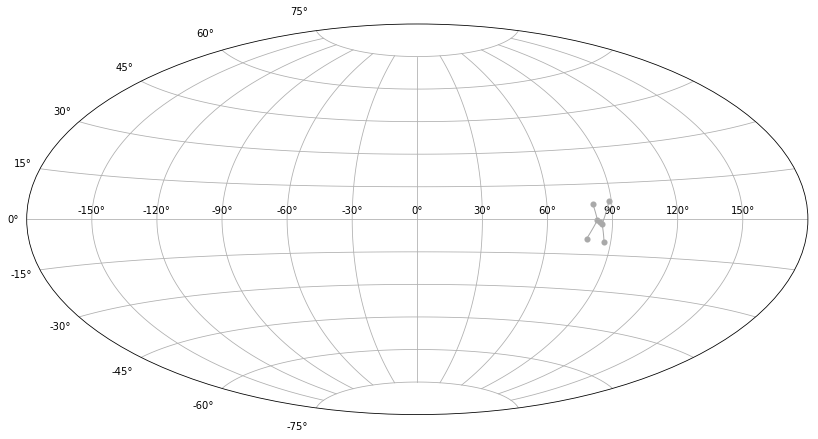

In [249]:
# Graph Orion
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection="aitoff")
plt.grid(True)


for a,b in zip(x,y):
    ax.scatter(a,b,linewidth = 0.1, color = '#A9A9A9')
    
ax.plot([x[4],x[0]],[y[4],y[0]],linewidth = 1, color = '#A9A9A9') 
ax.plot([x[5],x[2]],[y[5],y[2]],linewidth = 1, color = '#A9A9A9')
ax.plot([x[2],x[0]],[y[2],y[0]],linewidth = 1, color = '#A9A9A9')
ax.plot([x[6],x[0]],[y[6],y[0]],linewidth = 1, color = '#A9A9A9')
ax.plot([x[1],x[2]],[y[1],y[2]],linewidth = 1, color = '#A9A9A9')

# Graph
colorList = ['m','k','b','g','y','r','c']
for a,b,c in zip(x,y,colorList):
    ax.scatter(a,b,linewidth = 0.1, color = c)
    
ax.plot([x[4],x[0]],[y[4],y[0]],linewidth = 1, color = '#A9A9A9') 
ax.plot([x[5],x[2]],[y[5],y[2]],linewidth = 1, color = '#A9A9A9')
ax.plot([x[2],x[0]],[y[2],y[0]],linewidth = 1, color = '#A9A9A9')
ax.plot([x[6],x[0]],[y[6],y[0]],linewidth = 1, color = '#A9A9A9')
ax.plot([x[1],x[2]],[y[1],y[2]],linewidth = 1, color = '#A9A9A9')